In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data_cleaned.csv")
X = df.drop("Survived", axis = 1)
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=10)
print("X train and test sizes: {}, {}".format(X_train.shape, X_test.shape))
print("y train and test sizes: {}, {}".format(y_train.shape, y_test.shape))

X train and test sizes: (668, 24), (223, 24)
y train and test sizes: (668,), (223,)


In [3]:

def score(model, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test):
    print("train_score: ",model.score(X_train, y_train),end="\n")
    print("test_score: ",model.score(X_test, y_test))


### Base model

In [4]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)    
score(rf)

train_score:  0.9850299401197605
test_score:  0.8251121076233184


### Performance tuning the model
    1. max_depth
    2. n_estimators
    3. max_features: Number of features at each node
    4. min_samples_split
    5. min_samples_leaf
    6. criteria : Gini/entropy

### Tuning max_depth

In [10]:
def model_tuning(param = "max_depth", values = range(2,10)):
    l1 = []
    l2 = []
    for i in values:
        rf = RandomForestClassifier(random_state=42, max_depth=i)
        rf.fit(X_train, y_train)
        l1.append(rf.score(X_train, y_train))
        l2.append(rf.score(X_test, y_test))
    df1 = pd.DataFrame({param:values, "train_accuracy": l1, "test_accuracy": l2})
    plt.plot(df1[param],df1["train_accuracy"],  marker = "o", label  = "train")
    plt.plot(df1[param],df1["test_accuracy"], marker = "o",label = "test")
    plt.legend()
    

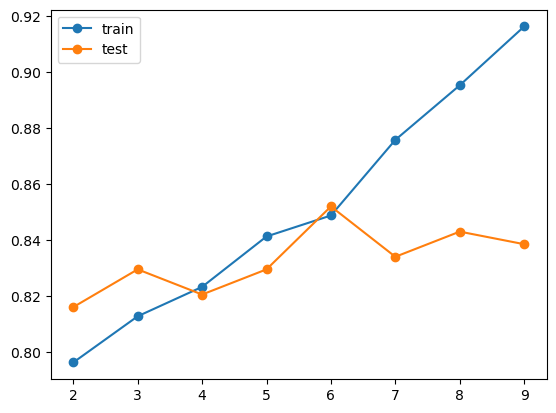

In [11]:
model_tuning()

### Model performance with max_depth = 6

In [12]:
rf = RandomForestClassifier(random_state=42, max_depth = 6)
rf.fit(X_train,y_train)    
score(rf)

train_score:  0.8488023952095808
test_score:  0.852017937219731


As observed from the base model score, the train score reduce from 98 to 84 reducing overfitting 
The test score improved from 82 to 85

In [25]:
def model_tuning(param = "n_estimators", values = range(50,200,20)):
    l1 = []
    l2 = []
    for i in values:
        rf = RandomForestClassifier(random_state=42, max_depth = 6, n_estimators=i)
        rf.fit(X_train, y_train)
        l1.append(rf.score(X_train, y_train))
        l2.append(rf.score(X_test, y_test))
    df1 = pd.DataFrame({param:values, "train_accuracy": l1, "test_accuracy": l2})
    plt.plot(df1[param],df1["train_accuracy"],  marker = "o", label  = "train")
    plt.plot(df1[param],df1["test_accuracy"], marker = "o",label = "test")
    plt.legend()

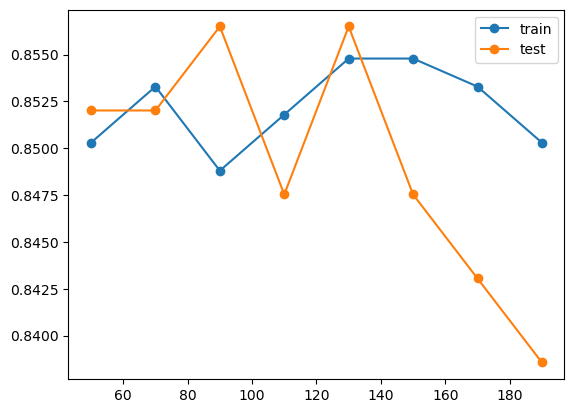

In [26]:
model_tuning()

In [30]:
rf = RandomForestClassifier(random_state=42, max_depth = 6, n_estimators=90)
rf.fit(X_train,y_train)    
score(rf)

train_score:  0.8488023952095808
test_score:  0.8565022421524664


By setting estimators to 90 the score improved in 3rd digit decimal

In [31]:
def model_tuning(param = "criteria", values = ["gini","entropy"]):
    l1 = []
    l2 = []
    for i in values:
        rf = RandomForestClassifier(random_state=42, max_depth = 6, criterion=i)
        rf.fit(X_train, y_train)
        l1.append(rf.score(X_train, y_train))
        l2.append(rf.score(X_test, y_test))
    df1 = pd.DataFrame({param:values, "train_accuracy": l1, "test_accuracy": l2})
    plt.plot(df1[param],df1["train_accuracy"],  marker = "o", label  = "train")
    plt.plot(df1[param],df1["test_accuracy"], marker = "o",label = "test")
    plt.legend()

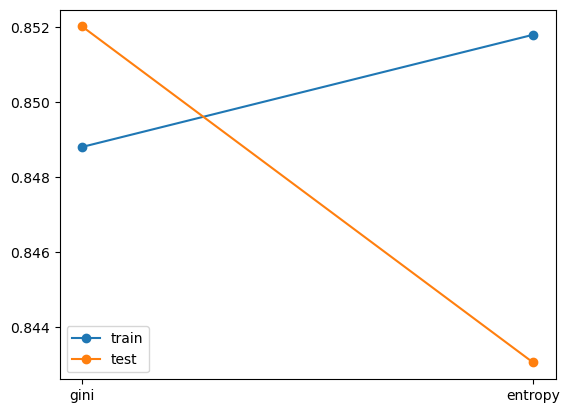

In [32]:
model_tuning()

In [36]:
rf = RandomForestClassifier(random_state=42, max_depth = 6, n_estimators=90)
rf.fit(X_train,y_train)    
score(rf)

train_score:  0.8488023952095808
test_score:  0.8565022421524664


#### Changing the max_features to log2 did not have any change in score
#### Changing the min_samples leaf/min_samples split deprecated the model performance both in train and test.